                               
                                
# Decision Trees and Random Forests: Fetal Health Classification

>Countries especially the undeveloped, still suffer an increase in child and maternal mortality. Mosly because to unequal socio-economic status, i.e some families not being able to afford the right medical health care services during pregnancies. The UN, however, expects that by 2030, this maternal and child mortality can be reduced to the minimum.

>Cardiotography(CTGs) is a  record of a fetal heart rate,  this machine recongnizes when the fetal is in distress..Mostly used in complicated pregnancies or during the last tri-mester of a pregnancy. A  CTG allows health professions the information on fetal health which help them make right decisions to prevent child and marternal mortality. This equiment works by sending ultsound to detects baby's heart beat and to the uterine walls.

>This data contains 2126 ecords of features extracted from Cardiotocogram exams, which was further classified by obstetricians  into 3 categories:

* Normal
* Suspect
* Pathological

>My aim is create a machine learning model that will predict the fetal health under the 3 categories and also identifying which feature is of most importance. The data is gotten from kaggle name 'Fetal Health Classification'.The data can be downloaded from 
[here](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/).

>we will be building a model using the decision tree algorithm and improve prediction using Random forest. 

>we will begin by looking at our data and doing some exploratory data analysis



## Methods

The following steps was taken during this analysis;

### 1. Importing libraries 
### 2. Loading the data set

In [82]:
import numpy as np # linear algebra
import pandas as pd # e.g. pd.read_csv


#Plotting Functions
import matplotlib.pyplot as plt

#Aesthetics
import seaborn as sns
sns.set_style('ticks') #No grid with ticks
print(sns.__version__)

0.11.2


In [83]:
#import data set, check info and the first 5 rows of the data set
fetal_data=pd.read_csv('fetal_health.csv')
fetal_data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

### 3. Checking out the variables and variable names in the data set

In [84]:
#Display column names contained in the data set
print(f"Dataset Columns:\n{fetal_data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [85]:
#checking info and data type, rows and column names in the data set
fetal_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

The data above does not contain any null values and all of the inputs are floats. 

### 4. Data cleaning and pre-processing

In [86]:
# Count the missing and null values in the data set.
miss_values = fetal_data.columns[ fetal_data.isnull().any()]
print(f"Missing values:\n{ fetal_data[miss_values].isnull().sum()}")

null_values = fetal_data.columns[ fetal_data.isna().any()]
print(f"Null values:\n{ fetal_data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [87]:
#shows the statistical description of the data set
fetal_data.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [88]:
#checking for copies and duplicates and droping such duplicates in the data set
fetal_health=fetal_data.copy()
fetal_health.drop_duplicates(inplace=True)
fetal_health.shape

(2113, 22)

In [89]:
#renaming data set and showing inputs
fetal_data=fetal_health
del fetal_health
fetal_data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [90]:
#describing the shape of the data after droping duplicates
fetal_data.shape

(2113, 22)

### 5. Exploratory Data Analysis

which consist of 

* A count plot showing barchart and a pie chart
* A histogram plot showing the skewness of the features contained in the data
* A scattered plot
* Heat map
* correlation plots shwing correlation betwwen the tagart variable and predictors showing the vales of predictions
* A parplot showing relation between pairs in the data set


1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64


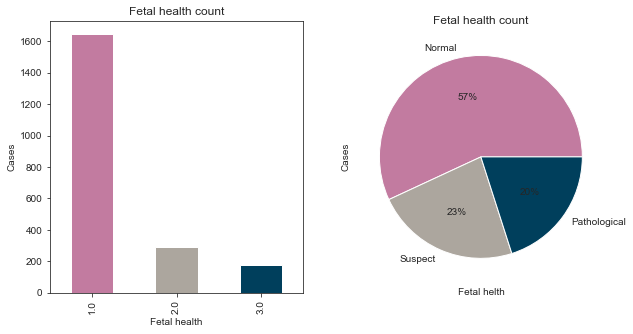

In [91]:
total = fetal_data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(fetal_data["fetal_health"].value_counts()) # count each classification

#barchart
plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=fetal_data)
vis_fetal_health = fetal_data.fetal_health.value_counts().plot(figsize=(10, 5), 
                        kind="bar", color = ["#c27ba0","#aca69e", "#003f5c"])
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")

#pie chart
plt.subplot(122)
# plt.pie([normal, suspect, pathological],labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological],labels=["Normal", "Suspect", "Pathological"],
                               colors = ["#c27ba0","#aca69e", "#003f5c"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

This shows that the target variable is unbalanced.

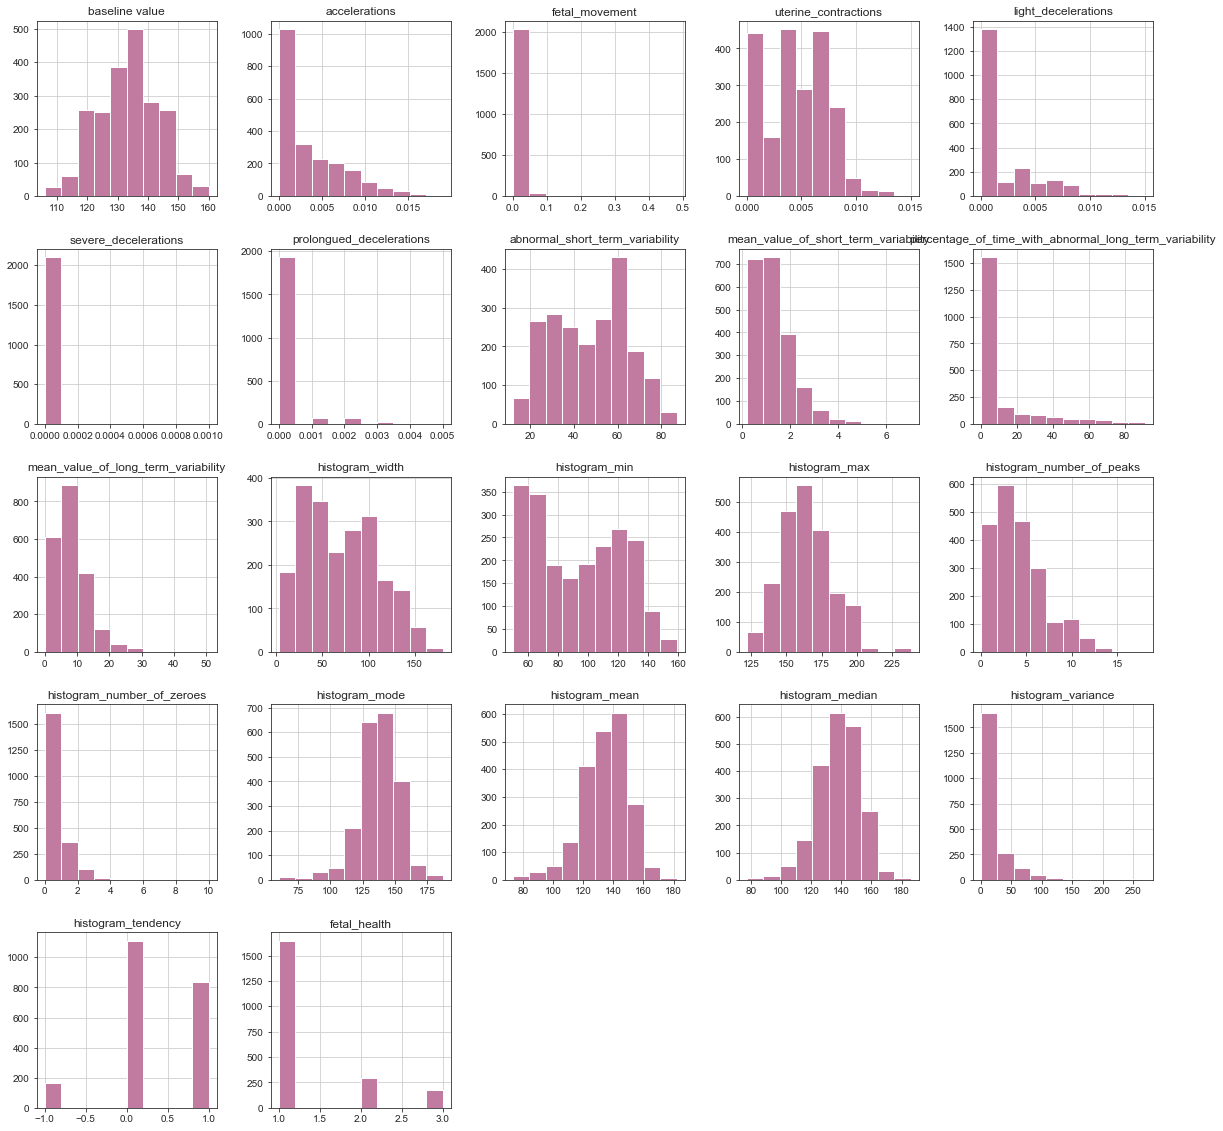

In [92]:
#histogram plot
fetal_data_hist_plot = fetal_data.hist(figsize = (20,20), color = "#c27ba0")

As shown above, some of the colums contained data set that are skewed to the right, while some are to the leaft and others are 
evenly distributed

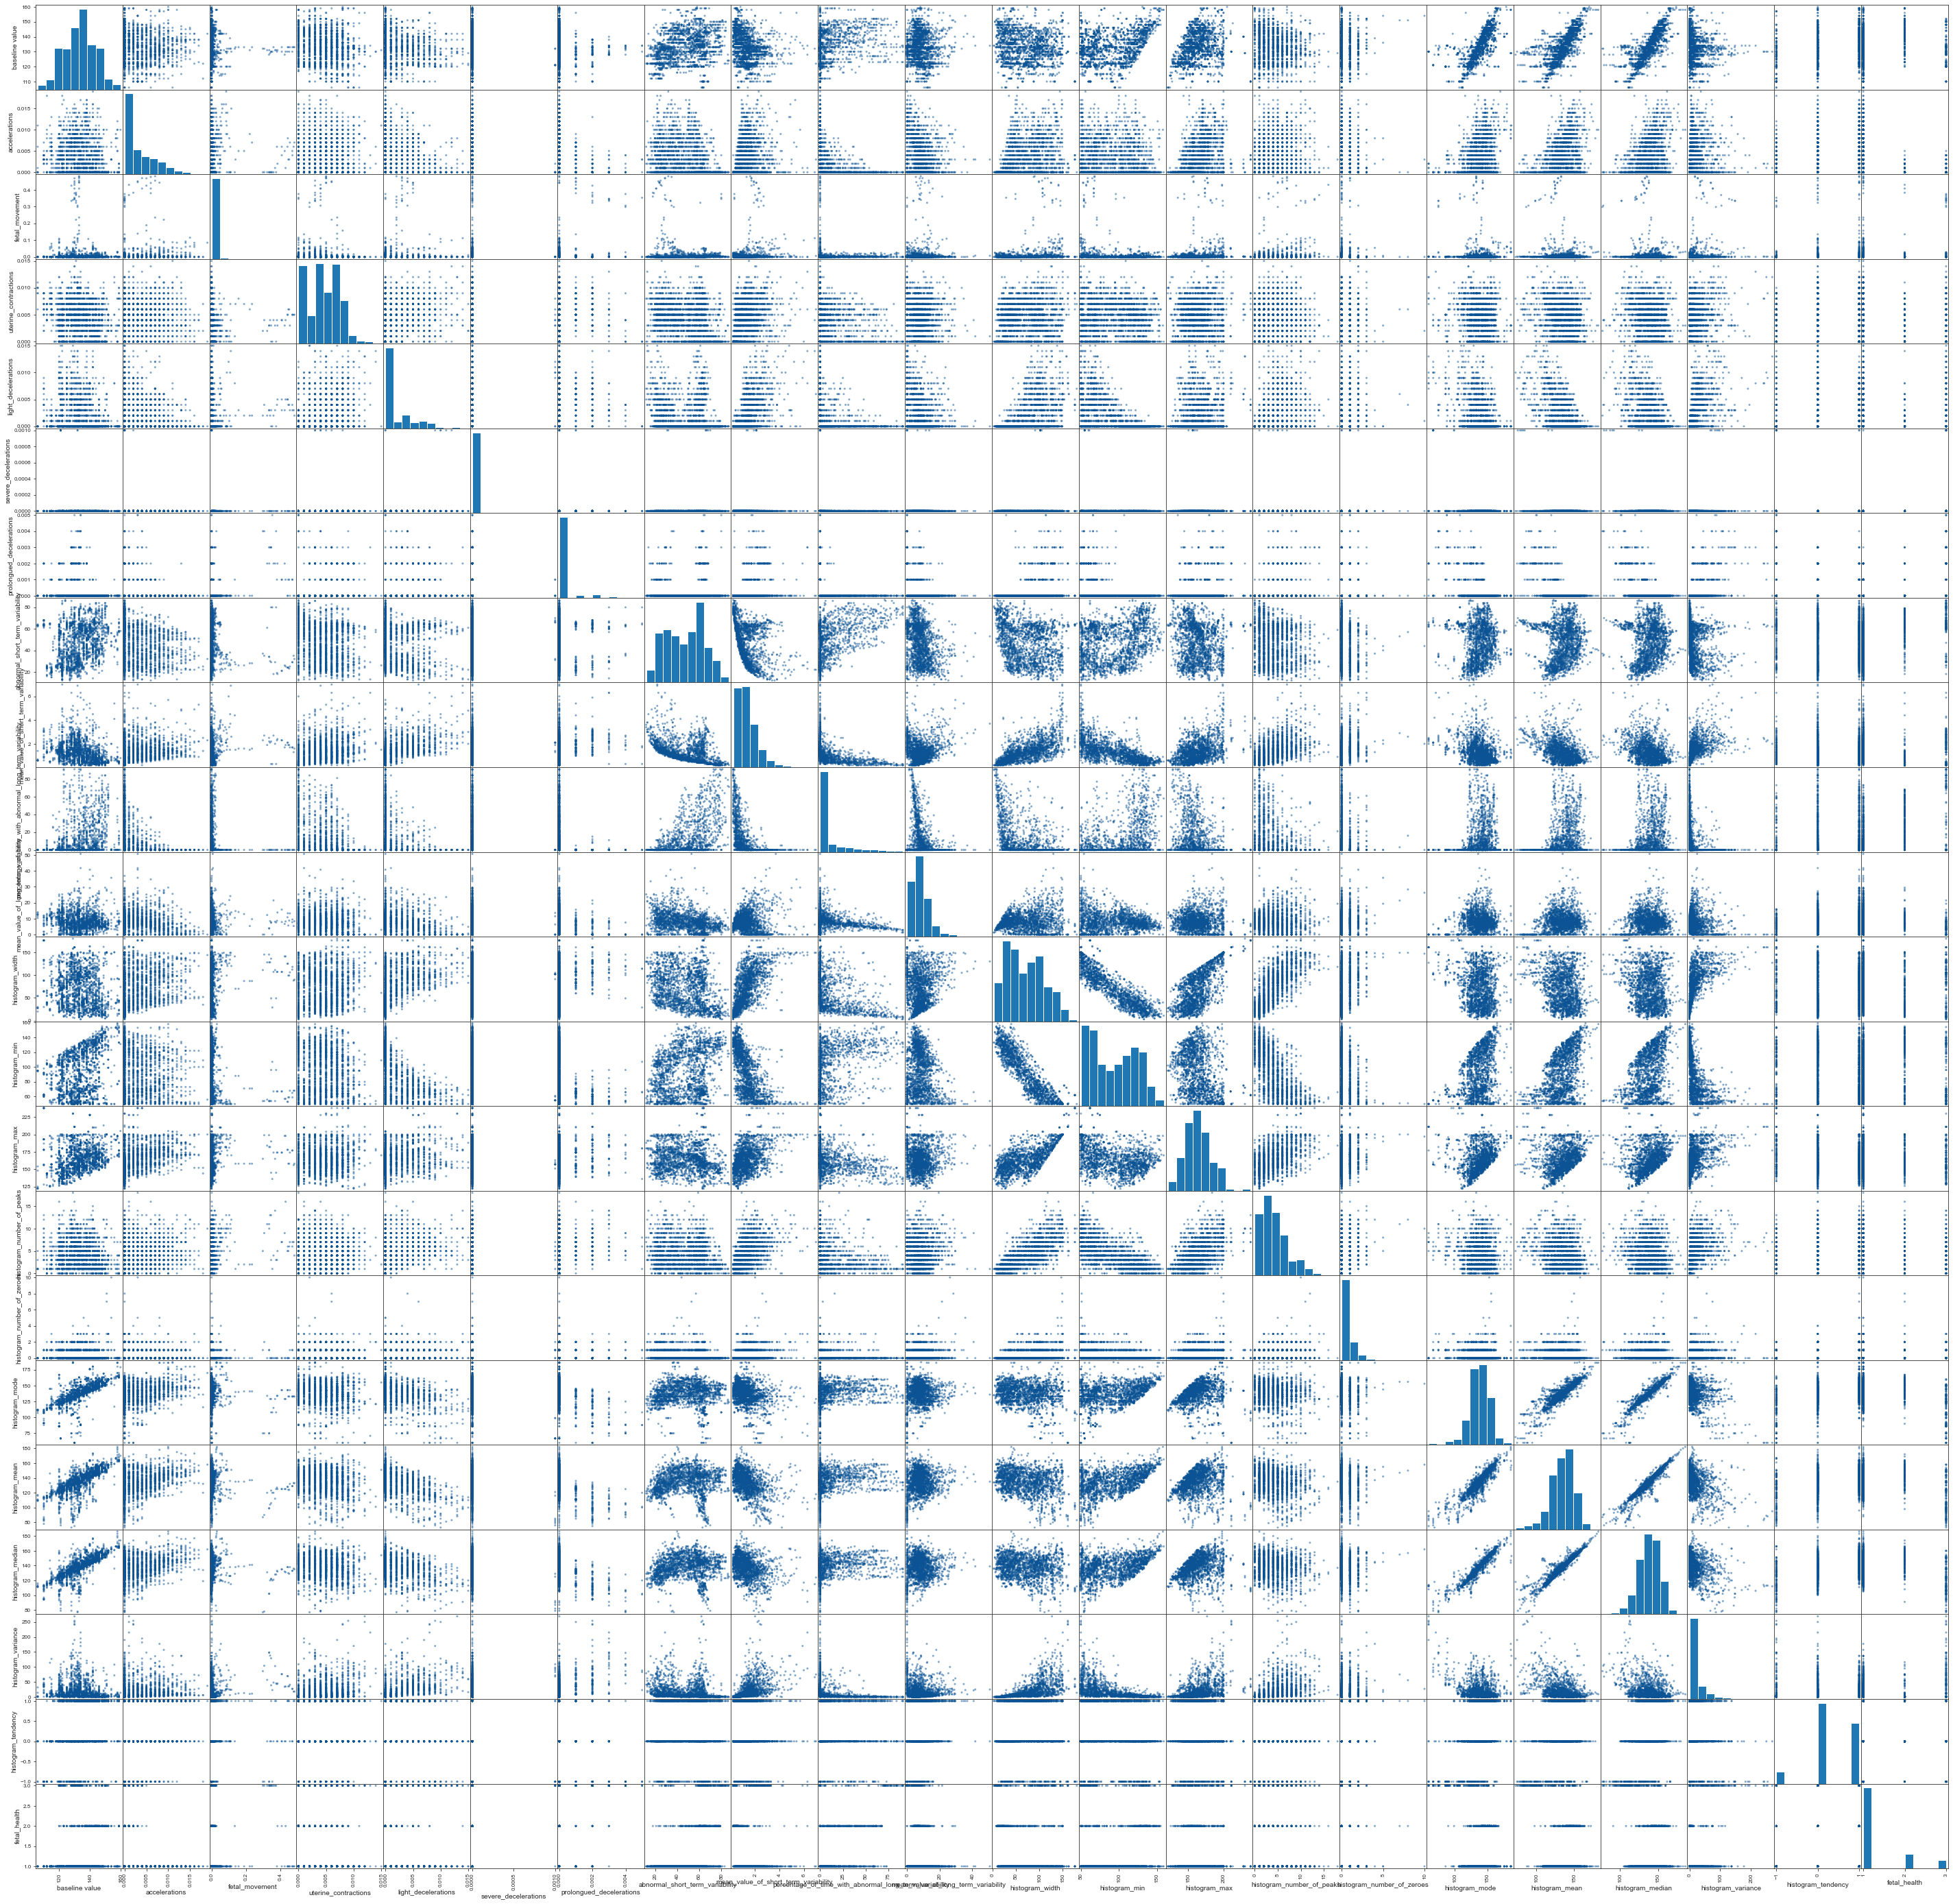

In [93]:
#scattred plot
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(fetal_data,figsize=(50, 50), color = "#0b5394")

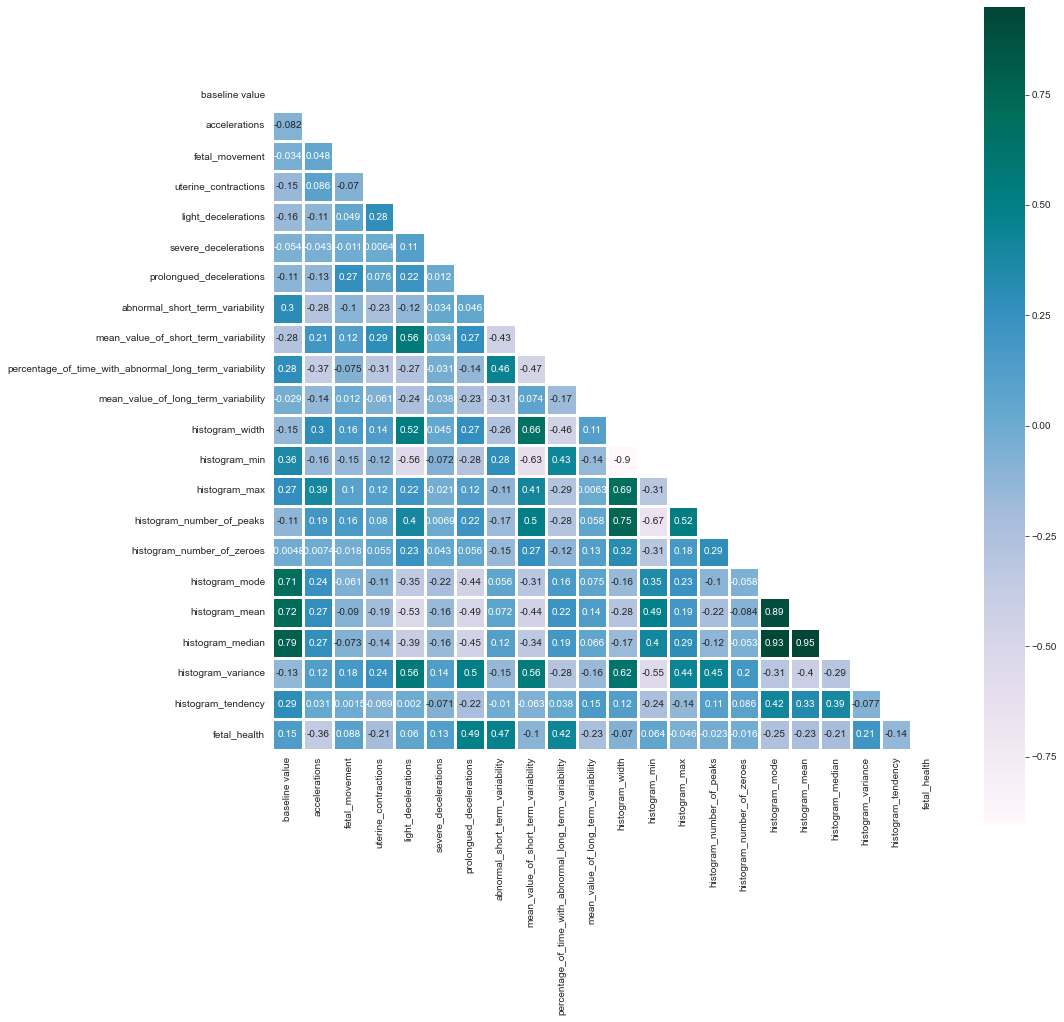

In [95]:
#correlation plot showing legends
corr = fetal_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="PuBuGn",annot=True)

the correlation plot will further explain feature importance using KBest Alogirthm with f_classif.

In [96]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

                                              Feature       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440


<AxesSubplot:xlabel='Score', ylabel='Feature'>

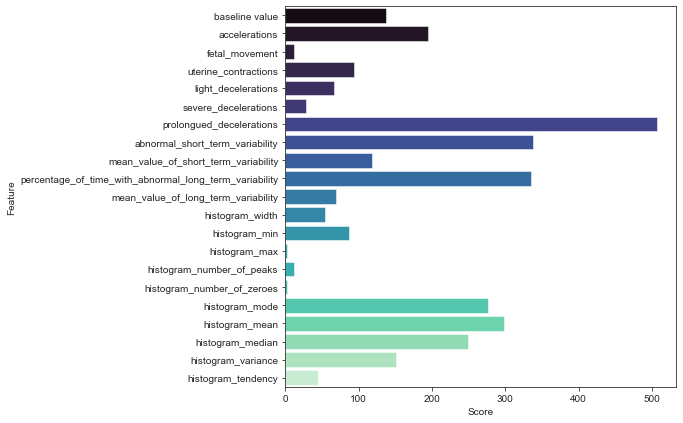

In [97]:
#Feature Selection on the data set before creating a model

X=fetal_data.drop(['fetal_health'], axis=1)
Y=fetal_data['fetal_health']
B_features = SelectKBest(score_func=f_classif, k='all')
Ft = B_features.fit(X,Y)
data_scores = pd.DataFrame(Ft.scores_)
data_columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
data_scores = pd.concat([data_columns,data_scores],axis=1)
data_scores.columns = ['Feature','Score']  #naming the dataframe columns
h= data_scores.nlargest(12,'Score')
print(h)

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=data_scores, x='Score', y='Feature', palette='mako',linewidth=0.5, saturation=2, orient='h')
#Plotter(plot, 'Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png') #Plotter function for aesthetics

plot


we can see from the plot above that prolong declaration is the variable with highest importance, we will move further to do the training and testing of the data to see if tthis result will hold.we also take features greater than 200 as they show less redundency. 

In [103]:
#Selection method
selection=data_scores[data_scores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])#Generates the features into a list
selection.append('fetal_health')#Adding the Level string to be used to make new data frame
new_name_fetal_data =fetal_data[selection] #New dataframe with selected features
new_name_fetal_data.head() #Lets take a look at the first 5

prolongued_decelerations  abnormal_short_term_variability  \
0                       0.0                             73.0   
1                       0.0                             17.0   
2                       0.0                             16.0   
3                       0.0                             16.0   
4                       0.0                             16.0   

   percentage_of_time_with_abnormal_long_term_variability  histogram_mode  \
0                                               43.0                120.0   
1                                                0.0                141.0   
2                                                0.0                141.0   
3                                                0.0                137.0   
4                                                0.0                137.0   

   histogram_mean  histogram_median  fetal_health  
0           137.0             121.0           2.0  
1           136.0             140.0           1.0  
2           135.0             138.0           1.0  
3           134.0             137.0           1.0  
4           136.0             138.0           1.0

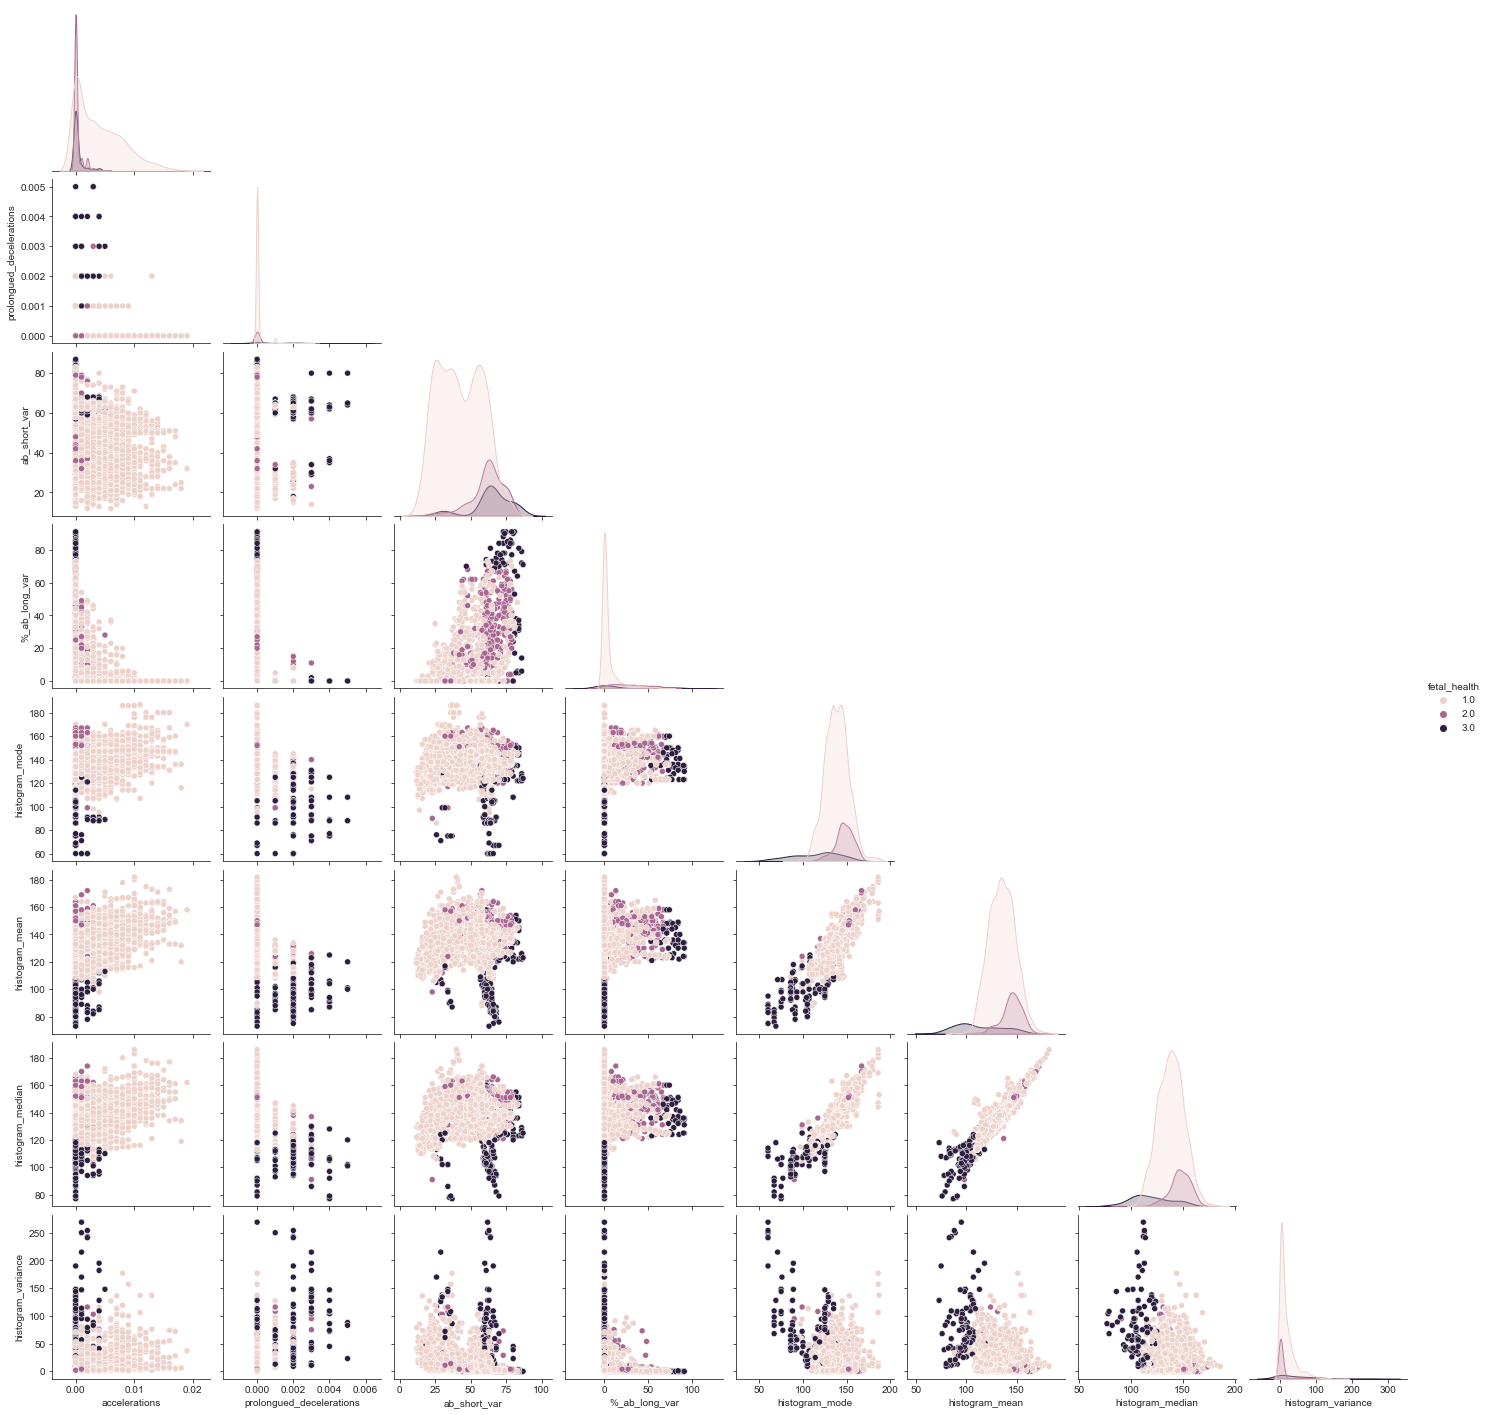

In [104]:
#Reduce the size of names for plotting and plotting a pair plot
new_name_fetal_data=new_fetal_data.rename(columns = {'percentage_of_time_with_abnormal_long_term_variability':'%_ab_long_var', 
                                           'abnormal_short_term_variability': 'ab_short_var'}) 
sns.pairplot(new_name_fetal_data, hue='fetal_health',corner=True)

we can also observe that 2 and 3 is well distinguished from each other

### 6. Splitting the data set


The data set is splitted into 70:30 as train and test,using a random state of 42.Then, we move forward
to view the shape of the train and test components.

In [27]:
X=fetal_data.drop('fetal_health',axis=1)#selecting predictors variable
y=fetal_data['fetal_health']#selecting the dependant variables

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70,stratify=y,shuffle=True, random_state = 42)


print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1479, 21)
y_train (1479,)
X_test (634, 21)
y_test (634,)


In [30]:
#perectanges of the split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(fetal_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(y.index)) * 100)

70.00% data is in training set
30.00% data is in test set


In [64]:
def get_train_report(model):
    
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))# returning train predict 

In [62]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))# returning test predict

### 7. Decision Tree classfier

In [114]:
from sklearn.metrics import classification_report
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=10)

In [112]:
y_prediction =decision_tree.predict(X_test)#testing the model and accuracy


print("Accuracy = ", metrics.accuracy_score(y_test,y_prediction))

Accuracy =  0.9290220820189274


In [38]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1152
         2.0       1.00      1.00      1.00       204
         3.0       1.00      1.00      1.00       123

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479



In [39]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       494
         2.0       0.79      0.78      0.79        88
         3.0       0.90      0.88      0.89        52

    accuracy                           0.93       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.93      0.93      0.93       634



The model predicted 92.9% accuracy from the test data, let us go further to apply Random  forest

### 8. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
RF_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
RF_model = RF_classification.fit(X_train, y_train)


In [48]:
train_report = get_train_report(RF_model)
print(train_report)

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      1152
         2.0       0.99      0.96      0.98       204
         3.0       1.00      1.00      1.00       123

    accuracy                           0.99      1479
   macro avg       1.00      0.99      0.99      1479
weighted avg       0.99      0.99      0.99      1479



In [50]:
test_report = get_test_report(RF_model)
print(test_report) 

              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       494
         2.0       0.78      0.66      0.72        88
         3.0       0.96      0.85      0.90        52

    accuracy                           0.92       634
   macro avg       0.89      0.83      0.86       634
weighted avg       0.92      0.92      0.92       634



using random forest predicted 92% accuracy lesser than using a decision tree, though both of high accuracy,
I went further to confirm the the result using other methods, as seen below, and same result wa gotten.

In [109]:
y_pred =RF_classification.predict(X_test)#testing the model

#from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.9227129337539433


### 9. Confusion matrix

[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

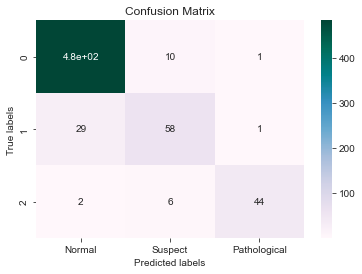

In [108]:
#creating a confusion metrics (heat map) for prediction of each category
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "PuBuGn")

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

### 10. Feature selection  

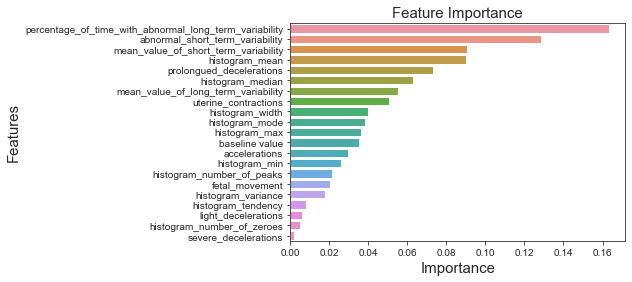

In [70]:
#selecting important features from the train data set in the RF model
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': RF_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()


percentage of time with the abnormal long term variability and abnormal short term variability are of most feature importance,
from the train data set' 

### 10. Mean Accuracy

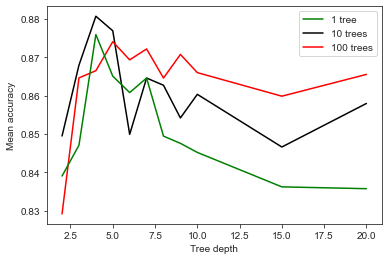

In [60]:
from sklearn.model_selection import cross_val_score
import math

max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
n_estimators_vals = [10,100]
mean_accuracy_store = []
sd_accuracy_store = []
k=5
for i, value in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    sd_cv = []
    for val in max_depth_vals:
        forest = RandomForestClassifier(n_estimators=value,bootstrap=True,max_features=4,criterion='gini',max_depth=val,random_state=i,oob_score=False)
        cv_scores = cross_val_score(forest, X, y, cv=k)
        avg = sum(cv_scores)/len(cv_scores)
        sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
        mean_accuracy_cv.append(avg)
        sd_cv.append(sd)
    mean_accuracy_store.append(mean_accuracy_cv)
    sd_accuracy_store.append(sd_cv)

fig = plt.figure()
ax = plt.axes()
line2, = ax.plot(max_depth_vals,mean_accuracy_store[0],color='black',label='10 trees')
line3, = ax.plot(max_depth_vals,mean_accuracy_store[1],color='red',label='100 trees')

#  accuracy scores as a function of tree depth for a single decision tree
mean_accuracy_cv = []
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=10)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    mean_accuracy_cv.append(avg)
    
line1, = ax.plot(max_depth_vals,mean_accuracy_cv,color='green',label='1 tree')


plt.legend(handles=[line1, line2, line3])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.show()


from the graph above we can notice that following the mean accuracy(green line) as the depth of trees increases the mean accuracy decreases.

# Result 

Although, the decision tree classifier and the random forest classifier produced similar accuracy of 93% and 92%, we can say that the decision tree classifier is the better model.Also, from the mean accuracy we can also observe that the the depth of the tree is 4.0, higher tree lengths causes lower mean accuracy.

Further more, we can say that abnormal long term variability, abnormal short term variability, mean values of short term variability and histogram mean are best important features that can be used to determine the fetal healthas shown in the feature 
selection plot.


# Conclusion

In conclusion,  as seen from the result of the algolrithms than was used it this notebook, though both classifiers produced 
higher accuracy, decision treeclasifier was gave higher result and as suvh the best model for this prediction. I suggest that other machine learning methods can be used to ascertain if a better result can be gotten. 

Furthermore, models can be re-trained with reduced dimensional data.Un-sampling can also be used for higher accuracy as predicting fetal health is important and a higher accuracy must be obtained.   